In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Dataset
import torchvision.utils
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F

In [2]:
import os 

In [3]:
# import imgshow and plot show
#impot class SiameseNetworkDataset 
from utils.plot_helpers import imshow, show_plot
from utils.siamese_dataset import SiameseNetworkDataset

In [12]:
# Load the training dataset
transformation = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                     transforms.RandomHorizontalFlip()
                                    ])

folder_datatrain = SiameseNetworkDataset(root_path=os.path.join('dataset_jpg1','train'), transform=transformation)

train_size = int(0.8 * len(folder_datatrain))
val_size = len(folder_datatrain) - train_size

siamese_datatrain, siamese_dataval = torch.utils.data.random_split(folder_datatrain, [train_size, val_size])


# Create a simple dataloader just for simple visualization-train
vis_datatrain = DataLoader(siamese_datatrain,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)

# Create a simple dataloader just for simple visualization-val
vis_dataval = DataLoader(siamese_dataval,
                        shuffle=True,
                        num_workers=0,
                        batch_size=8)


In [13]:
tmp = next(iter(siamese_datatrain))
len(tmp), tmp[0].shape, tmp[1].shape, tmp[2].shape

(3, torch.Size([3, 224, 224]), torch.Size([3, 224, 224]), torch.Size([1]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


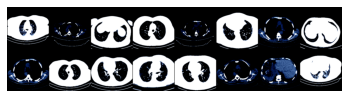

[1. 0. 0. 1. 1. 1. 0. 0.]


In [15]:
# Extract one batch

example_batchv = next(iter(vis_dataval))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same class of image, label is 0, same classe of image in both
concatenated = torch.cat((example_batchv[0], example_batchv[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batchv[2].numpy().reshape(-1))

In [16]:
np.unique(example_batchv[0][0])

array([-1.4842881 , -1.4671633 , -1.4500387 , -1.4329139 , -1.4157891 ,
       -1.3986644 , -1.3879551 , -1.3815396 , -1.370448  , -1.3644148 ,
       -1.352941  , -1.3472902 , -1.3354341 , -1.3301654 , -1.317927  ,
       -1.3130406 , -1.30042   , -1.2959158 , -1.2829131 , -1.2787911 ,
       -1.265406  , -1.2616663 , -1.247899  , -1.2445416 , -1.230392  ,
       -1.2274169 , -1.212885  , -1.2102921 , -1.1953781 , -1.1931673 ,
       -1.177871  , -1.1760426 , -1.160364  , -1.1595641 , -1.1589178 ,
       -1.1428571 , -1.1421349 , -1.141793  , -1.12535   , -1.1247058 ,
       -1.1246684 , -1.107843  , -1.1075436 , -1.1072767 , -1.0904187 ,
       -1.0903361 , -1.0898474 , -1.073294  , -1.0728291 , -1.0724182 ,
       -1.0561693 , -1.055322  , -1.0549891 , -1.0390445 , -1.0378151 ,
       -1.0375599 , -1.0219197 , -1.0203081 , -1.0201306 , -1.004795  ,
       -1.0028011 , -1.0027015 , -0.9876702 , -0.9852941 , -0.9852723 ,
       -0.9705454 , -0.9678431 , -0.9677871 , -0.95342064, -0.95

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


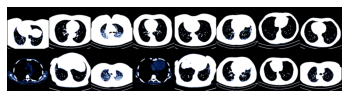

[1. 1. 0. 1. 1. 0. 0. 0.]


In [17]:
# Extract one batch
example_batcht = next(iter(vis_datatrain))

# Example batch is a list containing 2x8 images, indexes 0 and 1, an also the label
# If the label is 1, it means that it is not the same person, label is 0, same person in both images
concatenated = torch.cat((example_batcht[0], example_batcht[1]),0)

imshow(torchvision.utils.make_grid(concatenated))
print(example_batcht[2].numpy().reshape(-1))

In [ ]:
from utils.siamese_network import SiameseNetwork, ContrastiveLoss

In [ ]:
tmp=SiameseNetwork()
print(tmp.Vgg11)

<img src="images\loss_fnc.png" width="500" align="center"/>

In [ ]:
# Load the training dataset
train_dataloader = DataLoader(siamese_datatrain,
                        shuffle=True,
                        num_workers=0, #8
                        batch_size=64)
# Load the validation dataset
val_dataloader = DataLoader(siamese_dataval,
                        shuffle=True,
                        num_workers=0, #8
                        batch_size=64)

dataloaders={'train': train_dataloader,
              'val': val_dataloader}

In [ ]:
#net = SiameseNetwork().cuda()
net = SiameseNetwork().cuda()
criterion = ContrastiveLoss()
optimizer = optim.Adam(net.parameters(), lr = 0.00001)

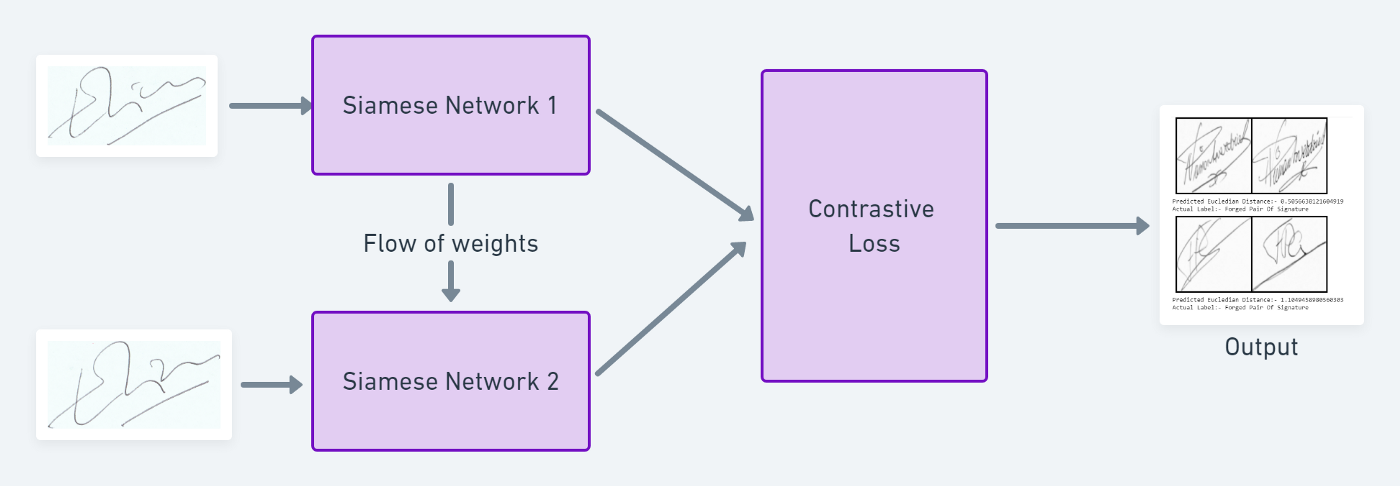

In [ ]:
# Train the model
model,metrics =net.train_eval(net,optimizer,
                              criterion,
                              dataloaders,
                              num_epochs = 100)

In [ ]:
acc = []
for i, data in enumerate(metrics["acc"]):
    acc.append(data.cpu().numpy())


In [ ]:
def show_plot(iteration,loss, name:str, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.plot(iteration,loss)
    plt.title(f"{name} at epoch {iteration[-1]}")
    plt.show()


In [ ]:
show_plot(metrics["counter"], metrics["loss_history"], "loss_history")
show_plot(metrics["counter"], acc, "acc")
show_plot(metrics["counter"], metrics["loss"], "loss")
# print('counter =',metrics["counter"])
# print('loss_history =',metrics["loss_history"])
# print('loss =',metrics["loss"])

## Save Trained Model

In [ ]:
model_path = 'trainded_models/model_vgg11.pth'
torch.save(model.state_dict(),model_path)

In [ ]:
model_path = 'trainded_models/model_vgg11.pth'
model = SiameseNetwork()
model.load_state_dict(torch.load(model_path))
model.eval()

In [ ]:
# Locate the test dataset and load it into the SiameseNetworkDataset
test_transformation = transforms.Compose([transforms.Resize((224,224)),
                                     transforms.ToTensor(),
                                     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

                                     ])

folder_test = SiameseNetworkDataset(root_path=os.path.join('dataset_jpg1','test'), transform=test_transformation)


test_dataloader = DataLoader(folder_test, num_workers=0, batch_size=1, shuffle=True)

# Grab one image that we are going to test
dataiter = iter(test_dataloader)
x0, _, _ = next(dataiter)

for i in range(10):
    # Iterate over 10 images and test them with the first image (x0)
    _, x1, label2 = next(dataiter)

    # Concatenate the two images together
    concatenated = torch.cat((x0, x1), 0)
    
    output1, output2 = model(x0, x1)
    euclidean_distance = F.pairwise_distance(output1, output2)
    imshow(torchvision.utils.make_grid(concatenated), f'Dissimilarity: {euclidean_distance.item():.2f}')

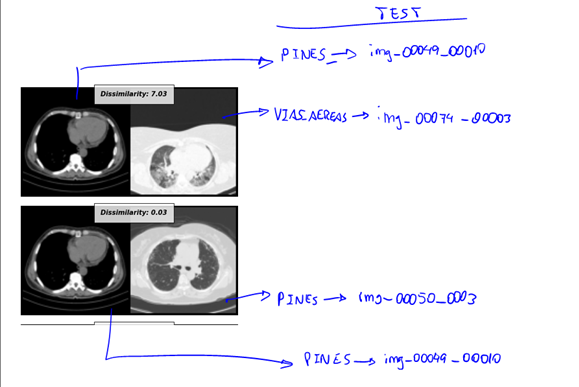

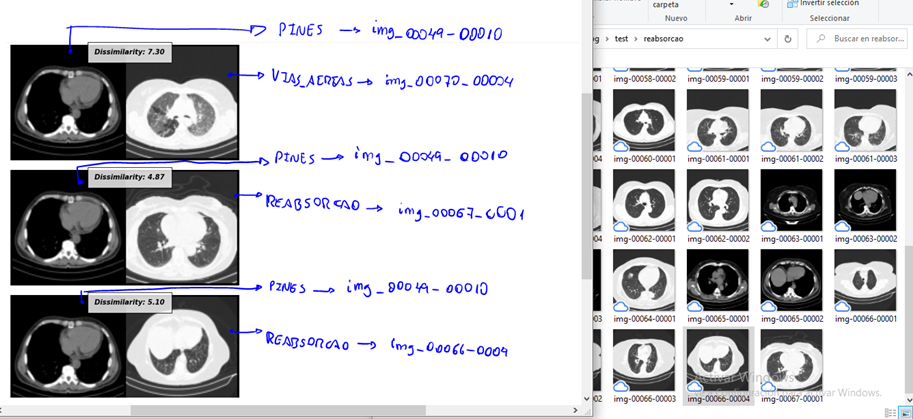

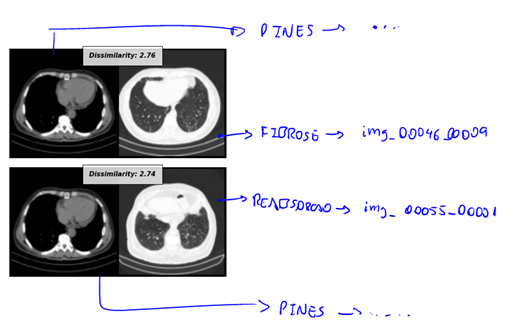